### In this task we will classify 28x28 images of handwritten digits using a CNN
---

In [2]:
import os
import cv2
import numpy as np
from keras.src.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
import keras
from sklearn.utils import shuffle

C:\Users\User\miniconda3\envs\ML-Problem-Archive\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [3]:
# Function for loading dataset
def load_dataset(path):
    encoder = LabelEncoder()
    labels = []
    images = []

    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)
        for file in os.listdir(folder_path):
            labels.append(folder)
            img = cv2.imread(os.path.join(folder_path, file), cv2.IMREAD_GRAYSCALE)
            images.append(img)

    images = np.array(images).reshape(-1, 28, 28, 1).astype(np.float32)
    labels = encoder.fit_transform(labels)
    return images, labels

In [4]:
# Load data
X_train, y_train = load_dataset(path="../MNIST-Hand-Drawn-Digits-Recognition-XGBOOST/data/train")
X_test, y_test = load_dataset(path="../MNIST-Hand-Drawn-Digits-Recognition-XGBOOST/data/test")

# Shuffle data
X_train, y_train = shuffle(X_train, y_train, random_state=42)

In [5]:
# Build model
model = keras.models.Sequential([
    keras.Input(shape=(28, 28, 1)),
    keras.layers.Rescaling(1./255),
    keras.layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=128, kernel_size=(2, 2), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(units=10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

In [6]:
# Train model
history = model.fit(
    X_train, y_train,
    batch_size=64,
    epochs=30,
    validation_split=0.3,
    callbacks=[early_stop]
)

Epoch 1/30
496/496 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8592 - loss: 0.4149 - val_accuracy: 0.9748 - val_loss: 0.0803
Epoch 2/30
496/496 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9609 - loss: 0.1272 - val_accuracy: 0.9828 - val_loss: 0.0575
Epoch 3/30
496/496 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9695 - loss: 0.0960 - val_accuracy: 0.9836 - val_loss: 0.0506
Epoch 4/30
496/496 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9750 - loss: 0.0792 - val_accuracy: 0.9866 - val_loss: 0.0429
Epoch 5/30
496/496 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9773 - loss: 0.0695 - val_accuracy: 0.9874 - val_loss: 0.0386
Epoch 6/30
496/496 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9797 - loss: 0.0635 - val_accuracy: 0.9899 - val_loss: 0.0341
Epoch 7/30
496/496 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9818 - loss: 0.0562 - val_accuracy: 0.9903 - val_loss: 0.0338
Epoch 8/30
496/496 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9832 - loss: 0.0504 - val_a

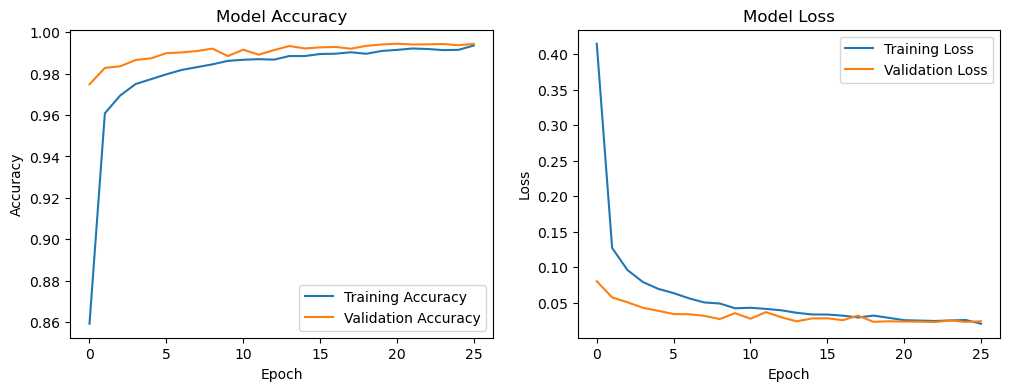

In [7]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


In [8]:
# Evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.2f}')
print(f'Test loss: {test_loss:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7958 - loss: 3.8113
Test accuracy: 0.80
Test loss: 3.81
